## This notebook can help to analyse data of cases or deaths caused by COVID19 against vaccination percentage (either fully vaccinated or vaccinated with booster shot) across counties in US

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import re

### Choosen time period in format "mm/dd/yyyy" [with current data possible between 12/13/2020 -  02/01/2022]
The beginning of administration of booster shot is 12/15/2021. Keep this in mind depending of what data is to be analysed.
Look below at the graphs to see picks in cases and deaths accross US

In [2]:
period_start = '12/15/2021'
period_end = '01/31/2022'

#### Date on which vaccination percentage will be used for the analysis [if it is not provided a average vaccination rate from start and end date (above) will be used]

In [3]:
vax_date = '12/15/2021'

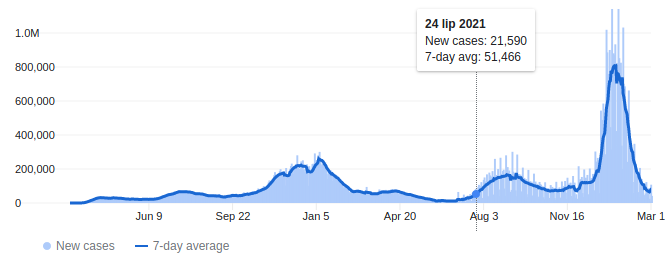

In [4]:
#Show cases plot from GOOGLE
Image(filename='input_data/cases.png') 

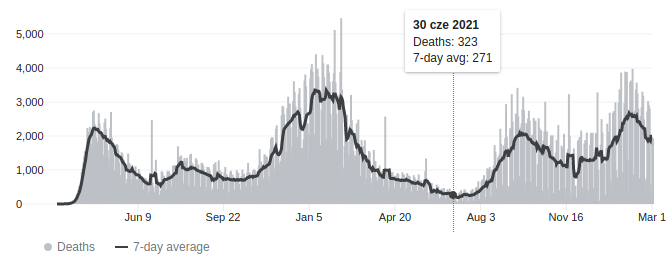

In [5]:
#Show deaths plot from GOOGLE
Image(filename='input_data/deaths.png') 

In [6]:
#Read population data [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df_pop = pd.read_csv('input_data/covid_county_population_usafacts.csv')

In [7]:
#Used functions and shared variables [Cases/Deaths processing]
def is_a_date(date):
    return re.match('^[0-9]{2}\/[0-9]{2}\/[0-9]{4}$',date)

def reformat_date(date):
    month, day, year = date.split("/")
    return year + "-" + month + "-" + day

def get_population(fips_list):
    temp_pop = list()
    for fips in fips_list:
        temp = df_pop.loc[(df_pop['countyFIPS'] == fips)]['population']
        temp_pop.append(temp.item())
    return temp_pop

columns = ['countyFIPS', 'County Name', 'State', reformat_date(period_start), reformat_date(period_end)]

In [8]:
#Proccess data related to deaths due to COVID-19 [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df = pd.read_csv('input_data/covid_deaths_usafacts.csv')

df_new = df.loc[:, columns]
filtered = df_new[ df_new['countyFIPS'] != 0 ]
#filtered.to_csv("data/deaths.csv", index = False)

#df_deaths = pd.read_csv('data/deaths.csv')
df_deaths = filtered
temp_pop = get_population(list(df_deaths['countyFIPS']))
df_deaths.insert(3, 'Population', temp_pop)
df_deaths.columns = ['countyFIPS', 'County Name', 'State','Population',  'Deaths_begin', 'Deaths_end']
df_deaths.to_csv("data/deaths_pop.csv", index = False)

In [9]:
#Proccess data related to number of infections (cases) of COVID-19 [aquired from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/]
df = pd.read_csv('input_data/covid_confirmed_usafacts.csv')

df_new = df.loc[:, columns]
filtered = df_new[ df_new['countyFIPS'] != 0 ]
#filtered.to_csv("data/cases.csv", index = False)

#df_cases = pd.read_csv('data/cases.csv')
df_cases = filtered
temp_pop = get_population(list(df_cases['countyFIPS']))
df_cases.insert(3, 'Population', temp_pop)
df_cases.columns = ['countyFIPS', 'County Name', 'State','Population','Cases_begin', 'Cases_end']
df_cases.to_csv("data/cases_pop.csv", index = False)

In [10]:
#Process data related to COVID-19 vaccination rates [aquired from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh]
df2 = pd.read_csv('input_data/COVID-19_Vaccinations_in_the_United_States_County.csv')

if (is_a_date(vax_date)):
    to_idx = max(df2.index[df2['Date'] == vax_date].tolist())+1
    from_idx = min(df2.index[df2['Date'] == vax_date].tolist())
    df_vax = df2[from_idx:to_idx]
else:
    to_idx = max(df2.index[df2['Date'] == period_start].tolist())+1
    from_idx = min(df2.index[df2['Date'] == period_end].tolist())
    df_vax = df2[from_idx:to_idx]

#df_vax.to_csv("data/vax.csv", index = False)
df_notnull = df_vax[df_vax['Series_Complete_Yes'].notnull()] #or Booster_Doses
#df_notnull.to_csv("data/vax_no_missing_data.csv", index = False)

fips_counties = list(df_cases['countyFIPS'])
vax_data = list()
for fips in fips_counties:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    temp = None
    temp2 = None
    if (is_a_date(vax_date)):
        temp = df_notnull.loc[(df_notnull['FIPS'] == fips_f) & (df_notnull['Date'] == vax_date)]
        temp2 = temp
    else:
        temp = df_notnull.loc[(df_notnull['FIPS'] == fips_f) & (df_notnull['Date'] == period_start)]
        temp2 = df_notnull.loc[(df_notnull['FIPS'] == fips_f) & (df_notnull['Date'] == period_end)]        
    if len(temp) == 1 and len(temp2) == 1:
        vax_data.append([fips, temp['Booster_Doses'].item(), temp2['Booster_Doses'].item(),
                         temp['Booster_Doses_Vax_Pct'].item(), temp2['Booster_Doses_Vax_Pct'].item(),
                         temp['Booster_Doses_18Plus'].item(), temp2['Booster_Doses_18Plus'].item(),
                         temp['Booster_Doses_18Plus_Vax_Pct'].item(), temp2['Booster_Doses_18Plus_Vax_Pct'].item(),
                         temp['Booster_Doses_65Plus'].item(), temp2['Booster_Doses_65Plus'].item(),
                         temp['Booster_Doses_65Plus_Vax_Pct'].item(), temp2['Booster_Doses_65Plus_Vax_Pct'].item(),
                         temp['Series_Complete_Yes'].item(), temp2['Series_Complete_Yes'].item(),
                         temp['Series_Complete_Pop_Pct'].item(), temp2['Series_Complete_Pop_Pct'].item(),
                         temp['Series_Complete_18Plus'].item(), temp2['Series_Complete_18Plus'].item(),
                         temp['Series_Complete_18PlusPop_Pct'].item(), temp2['Series_Complete_18PlusPop_Pct'].item(),
                         temp['Series_Complete_65Plus'].item(), temp2['Series_Complete_65Plus'].item(),
                         temp['Series_Complete_65PlusPop_Pct'].item(), temp2['Series_Complete_65PlusPop_Pct'].item()])
            
col = ['countyFIPS',
       'Booster_begin', 'Booster_end',
       'Booster_pct_begin', 'Booster_pct_end',
       'Booster18_begin', 'Booster18_end',
       'Booster18_pct_begin', 'Booster18_pct_end',
       'Booster65_begin', 'Booster65_end',
       'Booster65_pct_begin', 'Booster65_pct_end',
       'Complete_begin', 'Complete_end',
       'Complete_pct_begin', 'Complete_pct_end',
       'Complete18_begin', 'Complete18_end',
       'Complete18_pct_begin', 'Complete18_pct_end',
       'Complete65_begin', 'Complete65_end',
       'Complete65_pct_begin','Complete65_pct_end']

df_data = pd.DataFrame(vax_data, columns = col)  
df_data.to_csv("data/vax_processed.csv", index=False)

In [11]:
#Combine cases/deaths and vaccination data
df_deaths = pd.read_csv('data/deaths_pop.csv')
df_cases = pd.read_csv('data/cases_pop.csv')
df_vax = pd.read_csv('data/vax_processed.csv')

df_all = pd.concat([df_cases, df_deaths, df_vax], axis=1, join="inner")
df_all = df_all.loc[:,~df_all.columns.duplicated()]

df_all['Cases in given period'] = df_all['Cases_end'] - df_all['Cases_begin']
df_all['Deaths in given period'] = df_all['Deaths_end'] - df_all['Deaths_begin']
df_all['Percentage of fully vaccinated'] = (df_all['Complete_pct_begin'] + df_all['Complete_pct_end'])/2
df_all['Percentage of vaccinated with booster'] = (df_all['Booster_pct_begin'] + df_all['Booster_pct_end'])/2

#File from https://www.openintro.org/data/?data=county_complete
df_area = pd.read_csv('input_data/county_complete.csv')

fips_counties = list(df_all['countyFIPS'])
area_data = list()
for fips in fips_counties:
    row = df_area.loc[df_area['fips'] == fips]
    area_data.append(round(row['area_2010'].item(), 2))

df_all.insert(4, 'Land Area in square miles', area_data)
df_all.insert(5, 'Population Density', df_all['Population']/df_all['Land Area in square miles'])

df_all.to_csv("data/vax_cases_deaths.csv", index = False)

In [12]:
df_all

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete18_pct_begin,Complete18_pct_end,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster
0,1001,Autauga County,AL,55869,594.44,93.985936,10641,13251,158,163,...,46.1,46.1,5920,5920,66.3,66.3,2610,5,37.8,22.3
1,1003,Baldwin County,AL,223234,1589.78,140.418171,38413,50313,591,608,...,56.7,56.7,37483,37483,80.0,80.0,11900,17,46.9,25.0
2,1005,Barbour County,AL,24686,884.88,27.897568,3719,5054,81,83,...,49.7,49.7,3387,3387,69.7,69.7,1335,2,41.4,18.8
3,1007,Bibb County,AL,22394,622.58,35.969675,4388,5795,95,95,...,38.6,38.6,2233,2233,59.8,59.8,1407,0,32.3,22.0
4,1009,Blount County,AL,57826,644.78,89.683303,10904,13427,193,204,...,36.3,36.3,5663,5663,52.4,52.4,2523,11,29.3,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,42343,10426.65,4.061036,8216,10290,106,115,...,54.7,54.7,4774,4774,87.0,87.0,2074,9,43.2,33.5
3138,56039,Teton County,WY,23464,3995.38,5.872783,5460,9323,14,15,...,95.0,95.0,3549,3549,95.0,95.0,3863,1,87.2,35.4
3139,56041,Uinta County,WY,20226,2081.26,9.718152,4110,5335,31,34,...,58.6,58.6,2553,2553,84.4,84.4,1225,3,45.4,31.9
3140,56043,Washakie County,WY,7805,2238.55,3.486632,1855,2180,37,41,...,49.1,49.1,1350,1350,78.0,78.0,325,4,39.9,40.3
